In [3]:
import torchvision 
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.transforms.functional as TF
import torch.nn as nn
import matplotlib.pyplot as plt
from torch import optim

# 定义转换
transform1 = transforms.Compose([
    # transforms.Resize(28),
    transforms.ToTensor()  # 将图像转换为张量
])

train_data = torchvision.datasets.MNIST(  
    root = './MNIST/',
    train = True,                            
    transform = transform1,
    download=True
)

OSError: [WinError 1455] 页面文件太小，无法完成操作。 Error loading "D:\LenovoQMDownload\anaconda\lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [4]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

NameError: name 'DataLoader' is not defined

In [ ]:
img, t = train_data[0]
img.shape

In [ ]:
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels, 3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(2, 2))
    
    return nn.Sequential(*layers)

In [5]:
def vgg(conv_arch, in_channels = 1):
    conv_blk = []
    in_channels = in_channels
    for (num_convs, out_channels) in conv_arch:
        conv_blk.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels
    print(out_channels)
    return nn.Sequential(*conv_blk,
                         nn.Flatten(),
                         nn.Linear(out_channels * 7 * 7, 4096),
                         nn.ReLU(),
                         nn.Dropout(0.5),
                         nn.Linear(4096, 4096),
                         nn.ReLU(),
                         nn.Dropout(0.5),
                         nn.Linear(4096, 10))

128
[1, 99] loss: 229.132
[1, 199] loss: 225.298
[1, 299] loss: 215.901
[1, 399] loss: 176.148
[1, 499] loss: 107.717
[1, 599] loss: 72.721
[1, 699] loss: 60.422
[1, 799] loss: 51.062
[1, 899] loss: 49.840
[1, 999] loss: 44.823
[1, 1099] loss: 40.218
[1, 1199] loss: 38.355
[1, 1299] loss: 39.215
[1, 1399] loss: 35.603
[1, 1499] loss: 29.213
[1, 1599] loss: 31.308
[1, 1699] loss: 32.364
[1, 1799] loss: 30.935
[2, 99] loss: 25.793
[2, 199] loss: 27.092
[2, 299] loss: 28.267
[2, 399] loss: 25.049
[2, 499] loss: 23.353
[2, 599] loss: 22.642
[2, 699] loss: 21.736
[2, 799] loss: 19.494
[2, 899] loss: 20.031
[2, 999] loss: 19.705
[2, 1099] loss: 19.739
[2, 1199] loss: 18.671
[2, 1299] loss: 16.035
[2, 1399] loss: 16.091
[2, 1499] loss: 14.965
[2, 1599] loss: 14.480
[2, 1699] loss: 17.065
[2, 1799] loss: 16.223


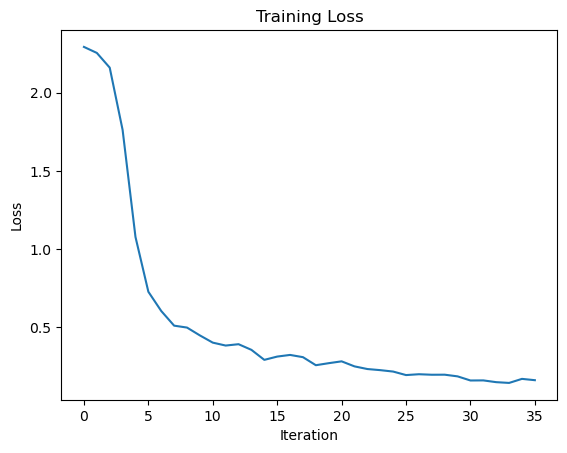

In [7]:
conv_arch = [(1, 64), (1, 128)] 
model = vgg(conv_arch)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 训练模型并记录损失值
losses = []
for epoch in range(2):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %d] loss: %.3f' % (epoch + 1, i, running_loss))
            losses.append(running_loss / 100)
            running_loss = 0.0

# 绘制损失图
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()